In [24]:
import pandas as pd
from rdkit.Chem import AllChem

In [15]:
with open("reactions.txt") as ifs:
    buff = ifs.read()

In [38]:
res = []
toks = buff.split("|")
for i in range(0,len(toks),4):
    res.append([x.strip() for x in toks[i+1:i+4]])

In [39]:
rxn_df = pd.DataFrame(res[1:],columns=[x.strip().replace(" ","_") for x in res[0]]).dropna()

In [48]:
for num,smarts in rxn_df[["Reaction_number","Reaction_SMARTS"]].values:
    print(num)
    print(smarts)
    AllChem.ReactionFromSmarts(smarts)

rxn101
[#6;a;$(c1:[c,n]:[c,n]:[c,n]:[c,n]:[c,n]:1):1][#35;A;D1].[#7;A;$(N[#6])!$(N=)!$([N-])!$(N#)!$([ND3])!$(N[ND4])!$(N[O,N])!$(N[C,S]=[S,O,N]):2]>>[#6:1]-[#7:2]


[12:29:18] SMARTS Parse Error: syntax error while parsing: [#7;A;$(N[#6])_100!$(N=)_101!$([N-])_102!$(N#)_103!$([ND3])_104!$(N[ND4])_105!$(N[O,N])_106!$(N[C,S]=[S,O,N])_107:2]
[12:29:18] SMARTS Parse Error: Failed parsing SMARTS '[#7;A;$(N[#6])_100!$(N=)_101!$([N-])_102!$(N#)_103!$([ND3])_104!$(N[ND4])_105!$(N[O,N])_106!$(N[C,S]=[S,O,N])_107:2]' for input: '[#7;A;$(N[#6])!$(N=)!$([N-])!$(N#)!$([ND3])!$(N[ND4])!$(N[O,N])!$(N[C,S]=[S,O,N]):2]'


ValueError: ChemicalReactionParserException: Problems constructing reactant from SMARTS: [#7;A;$(N[#6])!$(N=)!$([N-])!$(N#)!$([ND3])!$(N[ND4])!$(N[O,N])!$(N[C,S]=[S,O,N]):2]

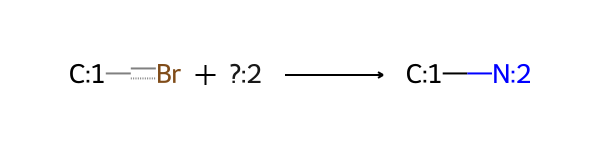

In [52]:
smarts = "[#6;a;$(c1:[c,n]:[c,n]:[c,n]:[c,n]:[c,n]:1):1][#35;A;D1].[#7;A;$(N[#6])!$(N=*)!$([N-])!$(N#*)!$([ND3])!$([ND4])!$(N[O,N])!$(N[C,S]=[S,O,N]):2]>>[#6:1]-[#7:2]"
AllChem.ReactionFromSmarts(smarts)

In [53]:
smarts

'[#6;a;$(c1:[c,n]:[c,n]:[c,n]:[c,n]:[c,n]:1):1][#35;A;D1].[#7;A;$(N[#6])!$(N=*)!$([N-])!$(N#*)!$([ND3])!$([ND4])!$(N[O,N])!$(N[C,S]=[S,O,N]):2]>>[#6:1]-[#7:2]'

In [51]:
rxn_df.Reaction_SMARTS.values[0]

'[#6;a;$(c1:[c,n]:[c,n]:[c,n]:[c,n]:[c,n]:1):1][#35;A;D1].[#7;A;$(N[#6])!$(N=)!$([N-])!$(N#)!$([ND3])!$(N[ND4])!$(N[O,N])!$(N[C,S]=[S,O,N]):2]>>[#6:1]-[#7:2]'

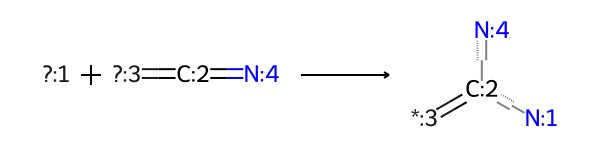

In [54]:
AllChem.ReactionFromSmarts("[N;D1$(N[#6]),D2$(N([#6])[#6]);$(N-[#6])!$(N[C,S]=[O,N,S]):1].[N;D2;$(N[#6]):4]=[C;D2:2]=[O,S;D1:3]>>[N:1][C:2](=[*:3])[N:4]")

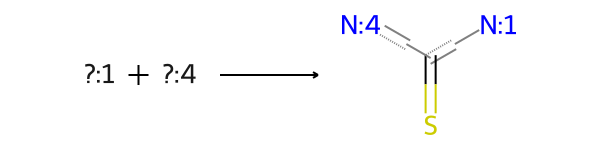

In [55]:
AllChem.ReactionFromSmarts("[N;D1$(N[#6]),D2$(N([#6])[#6]);$(N-[#6])!$(N[C,S]=[O,N,S]):1].[N;D1$(N[#6]),D2$(N([#6])[#6]);$(N-[#6])!$(N[C,S]=[O,N,S]):4]>>[N:1][C](=S)[N:4]")